# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [22]:
import pandas as pd

df =pd.read_csv('train.csv')
a=pd.read_csv('train.csv')

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [23]:
def num_nans(df):
    return df.isnull().any(axis=1).sum() 
#print(df.isnull().any(axis=1).sum())
print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [24]:
def drop_na(df):
    df.drop(columns=df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>200].index,inplace=True)
    return df
df = drop_na(df)
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [25]:
def to_numerical(df):
    df['Sex'].replace({"male": 0, "female": 1},inplace=True)
    return df['Sex']

df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [26]:
def extract_names(df):
    n=pd.DataFrame()
    n['f_n']=df['Name'].str.split(' ').str[2]
    n['m_n']=df['Name'].str.split(' ').str[3]
    n['l_n']=df['Name'].str.split(',').str[0]
    n['t']  =df['Name'].str.split(',').str[1].str.split('.').str[0]
    return n

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [27]:
def replace_with_mean(df):
    
    return df["Age"].fillna(round(df['Age'].mean(),1))

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

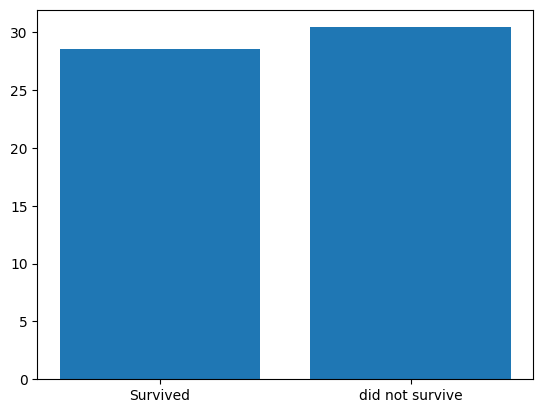

In [28]:
import matplotlib.pyplot as plt 
s = df[df['Survived'] == 1]['Age'].mean()
d_n_s = df[df['Survived']== 0]['Age'].mean()

plt.bar(['Survived', 'did not survive'],[s, d_n_s])
plt.show()


-> comment: For those who survive,the average age of them are lower than that don't survive.Might becuase in such cases,the young are usually saved first, or it shows that the young has more capacity to survive

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

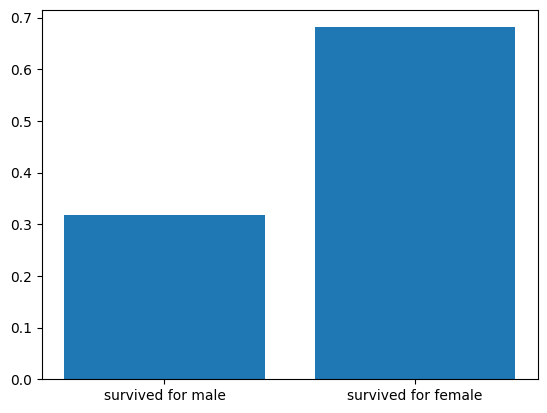

In [29]:
s=len(df[df['Survived'] == 1])
m  = len(df[(df['Survived'] == 1)&(df['Sex'] == 0)])/s
wm = len(df[(df['Survived'] == 1)&(df['Sex'] == 1)])/s

plt.bar(['survived for male', 'survived for female'],[m, wm])
plt.show()

-> most of people who survived are female

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

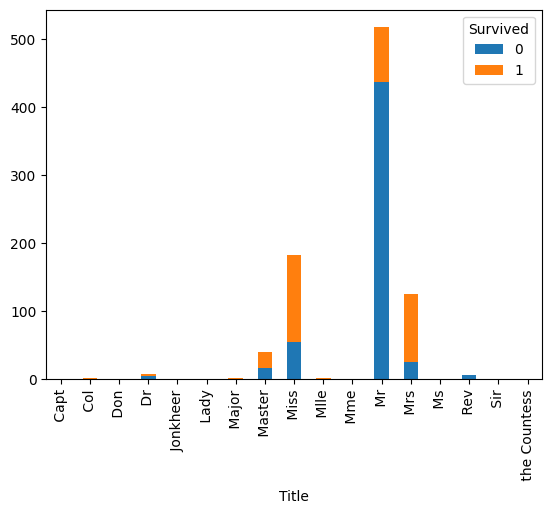

In [30]:
b=pd.crosstab(index = df["Title"], columns = df["Survived"])
b.plot.bar(stacked=True)
plt.show()

-> women with title of Miss and Mrs have high chance to survive. people with title of master have almost half chance to survive. men with title of Mr have low chance to survive

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

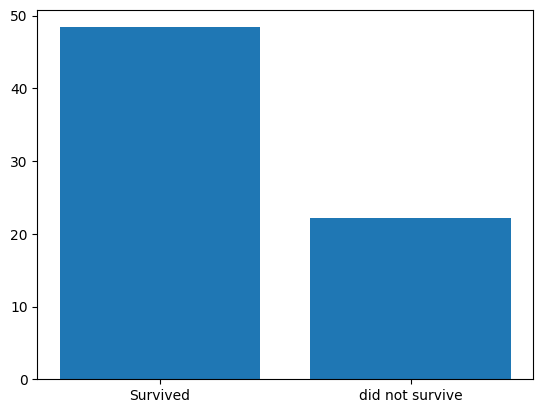

In [31]:
s_f = df[df['Survived'] == 1]['Fare'].mean()
d_n_s_f = df[df['Survived']== 0]['Fare'].mean()

plt.bar(['Survived', 'did not survive'],[s_f, d_n_s_f])
plt.show()

-> for those who survived ,the average of fare is far more than that of who did'n survive

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

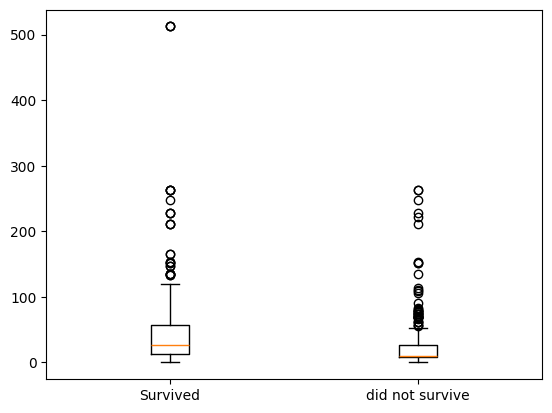

In [32]:
s_f = df[df['Survived'] == 1]['Fare']
d_n_s_f = df[df['Survived']== 0]['Fare']

plt.boxplot([s_f, d_n_s_f],labels=['Survived', 'did not survive'])
plt.show()

-> the minimun are alamost same,but the maximun of survived is higher than non-survive.the average of survived is higher.the outlier of survived is also higher

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [33]:
def m_fare(df):
    mean = round(df["Fare"].mean(),5)
    std = round(df["Fare"].std(),5)
    actual_fare = df["Fare"]
    df["modified Fare"] = round(((actual_fare - mean)/std), 5)
    return df["modified Fare"]
m_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title,modified Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr,-0.50216
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs,0.78640
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss,-0.48858
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs,0.42049
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr,-0.48606


#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [34]:
df =df.select_dtypes(['number']) 
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,modified Fare
0,1,0,3,0,22.0,1,0,7.2500,-0.50216
1,2,1,1,1,38.0,1,0,71.2833,0.78640
2,3,1,3,1,26.0,0,0,7.9250,-0.48858
3,4,1,1,1,35.0,1,0,53.1000,0.42049
4,5,0,3,0,35.0,0,0,8.0500,-0.48606


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [35]:
from sklearn.metrics.pairwise import euclidean_distances as e_d
import numpy as np
def N_most_similar_pairs(df, N):
    df_no_id=df.drop(columns=['PassengerId'])
    dist=e_d(df_no_id,df_no_id)
    np.fill_diagonal(dist,float('inf'))

    pairs = np.where(dist == np.amin(dist))

    passenger = []
    #a is a dataframe create as begining(first question),has full data
    for i in range(N):
        name_1 = a['Name'][((df['PassengerId'] == pairs[0][i]+1))].tolist()
        name_2 = a['Name'][((df['PassengerId'] == pairs[1][i]+1))].tolist()
        
        passenger.append(name_1+name_2)

    return passenger



    #a,b=np.shape(dist)
    #print(a,b)
    

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [['Allen, Mr. William Henry', 'Brocklebank, Mr. William Alfred'], ['Emir, Mr. Farred Chehab', 'Yousif, Mr. Wazli'], ['Emir, Mr. Farred Chehab', 'Lahoud, Mr. Sarkis']]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


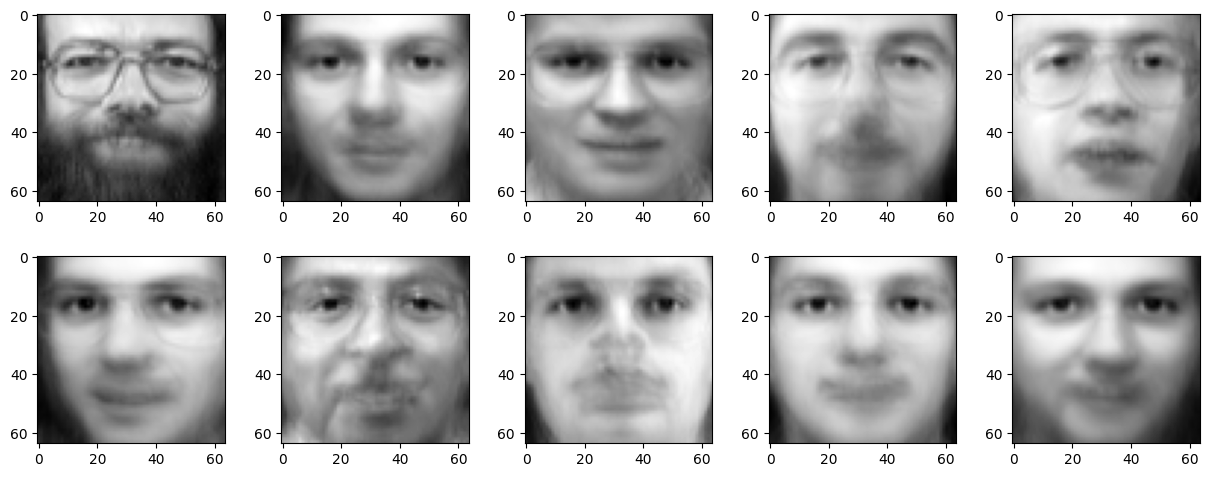

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

# your code here
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(faces_data)

# Plot the centroid of each cluster
fig, axes = plt.subplots(2,5,figsize=(15, 6),gridspec_kw=dict(hspace=0.1,wspace=0.3))


for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(64, 64), cmap='gray')
plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [37]:
from sklearn.metrics import silhouette_score 

kmeans_silhouette = silhouette_score(faces_data,kmeans.labels_)
target_silhouette = silhouette_score(faces_data,faces.target)

print(f"Silhouette Score - K-means: {kmeans_silhouette:.2f}")
print(f"Silhouette Score - label: {target_silhouette:.2f}")

Silhouette Score - K-means: 0.09
Silhouette Score - label: 0.11


The k-means and the silhouette score obtained by provided label are close to each other and close to 0. Which tell us the clustes are not well separated, or both method are not able to configure well separated cluster base on information provided.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

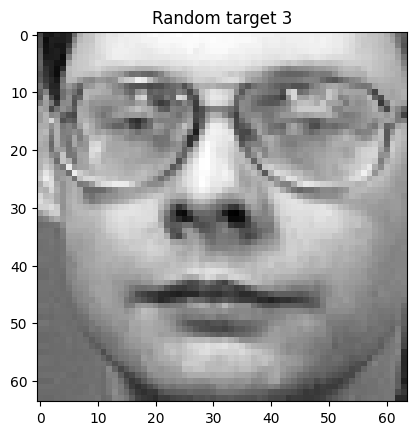

In [38]:
import numpy as np

random_idx = np.random.randint(faces.images.shape[0])

# Plot the random image
plt.title(f"Random target {faces.target[random_idx]}")
plt.imshow(faces.images[random_idx], cmap='gray')
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


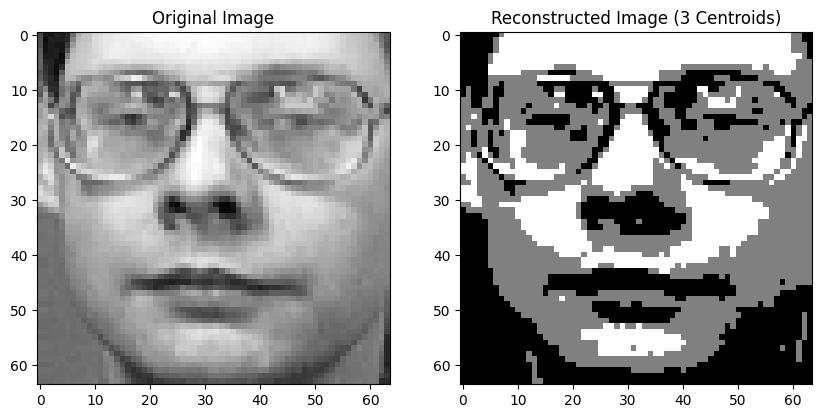

In [39]:
original_image = faces.images[random_idx]

original_image_2d = original_image.reshape((-1, 1))

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(original_image_2d)

reconstruct_label = kmeans.labels_
reconstruct_image = kmeans.cluster_centers_[reconstruct_label]

reconstruct_image_2d = reconstruct_image.reshape(original_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(reconstruct_image_2d, cmap='gray')
ax[1].set_title('Reconstructed Image (3 Centroids)')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


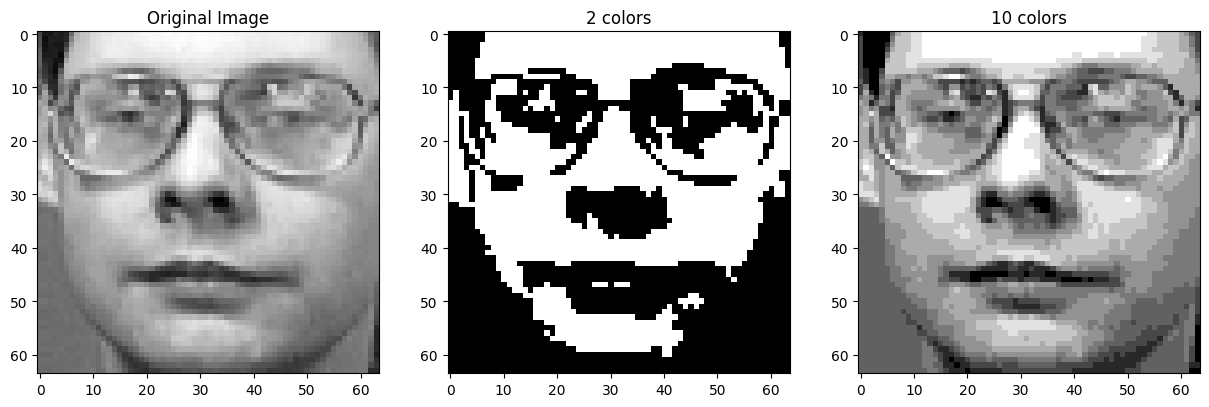

In [40]:
def n_colors(image, n, ax):
    image_2d = image.reshape((-1, 1))
    
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(image_2d)
    reconstruct_labels = kmeans.labels_
    
    reconstruct_image = kmeans.cluster_centers_[reconstruct_labels].reshape(image.shape)
    
    ax.imshow(reconstruct_image, cmap='gray')
    ax.set_title(f'{n} colors')


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(original_image, cmap='gray')
ax[0].set_title('Original Image')

n_colors(original_image, n=2, ax=ax[1])
n_colors(original_image, n=10, ax=ax[2])

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

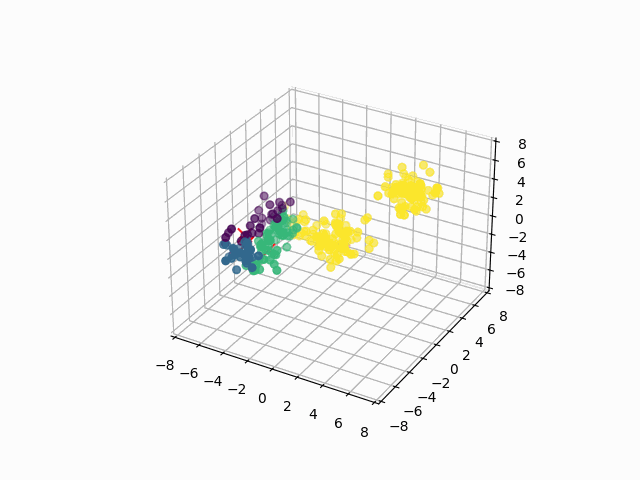

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from PIL import Image as im
from IPython.display import display, Image
import sklearn.datasets as datasets

# Generate a 3D dataset
centers = [[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]
X, _ = datasets.make_blobs(n_samples=300, centers=centers, cluster_std=1, random_state=0)

class KMeans3D:

    def __init__(self, data, k):
        self.data = data
        self.k = k
        self.assignment = [-1 for _ in range(len(data))]
        self.snaps = []

    def snap(self, centers):
        TEMPFILE = "snapshot.png"

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=self.assignment, s=30)
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='r', s=100, marker='x')

        ax.set_xlim(-8, 8)  # Set limits for X-axis
        ax.set_ylim(-8, 8)  # Set limits for Y-axis
        ax.set_zlim(-8, 8)  # Set limits for Z-axis

        fig.savefig(TEMPFILE)
        plt.close()
        self.snaps.append(im.fromarray(np.asarray(im.open(TEMPFILE))))

    def initialize(self):
        return self.data[np.random.choice(range(len(self.data)), self.k, replace=False)]

    def distance(self, x, y):
        return np.linalg.norm(x - y)

    def assign(self, centers):
        for i in range(len(self.data)):
            delta = [float('inf'), 0]
            for j in range(len(centers)):
                distance = self.distance(centers[j], self.data[i])
                if distance < delta[0]:
                    delta[0] = distance
                    delta[1] = j

            self.assignment[i] = delta[1]

    def get_centers(self):
        centers = []

        for i in set(self.assignment):
            cluster = []

            for j in range(len(self.data)):
                if self.assignment[j] == i:
                    cluster.append(self.data[j])
            x, y, z = 0, 0, 0
            for delta in range(len(cluster)):
                x += cluster[delta][0]
                y += cluster[delta][1]
                z += cluster[delta][2]
            centers.append([x / len(cluster), y / len(cluster), z / len(cluster)])

        return np.array(centers)

    def is_diff_centers(self, centers, new_centers):
        n = len(centers)
        flag = 0
        for i in range(n):
            if centers[i][0] != new_centers[i][0]:
                flag = 1

        if flag == 1:
            return True
        return False

    def lloyds(self):
        centers = self.initialize()
        self.assign(centers)
        self.snap(centers)
        new_centers = self.get_centers()

        while self.is_diff_centers(centers, new_centers):
            self.assign(new_centers)
            centers = new_centers
            self.snap(centers)
            new_centers = self.get_centers()

# Create an instance of the modified KMeans3D class
kmeans = KMeans3D(X, 4)
kmeans.lloyds()
images = kmeans.snaps

# Save the images as a 3D GIF
images[0].save(
    'kmeans3Danimation.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

display(Image(data=open('/Users/frankli/Documents/BU/CS506/homework-1-FrankLi3/kmeans3Danimation.gif','rb').read(), format='png'))